In [1]:
import pandas as pd

df = pd.read_csv("accomodation_info.csv", index_col=0, parse_dates=[0])

In [2]:
df.head()

,顧客ID,宿泊者名,プラン,金額
日時,,,,
2018-11-01 00:02:21,110034,若松 花子,B,19000
2018-11-01 00:03:10,112804,津田 美加子,D,20000
2018-11-01 00:06:19,110275,吉本 美加子,D,20000
2018-11-01 00:08:41,110169,坂本 直人,B,19000
2018-11-01 00:12:22,111504,青山 零,A,15000


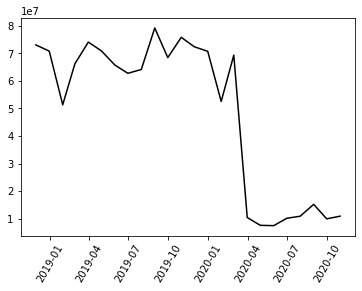

In [3]:
import matplotlib.pyplot as plt

# 月ごとの売上と利用者数
plt.plot(df["金額"].resample('M').sum(), color="k")
plt.xticks(rotation=60)
plt.show()

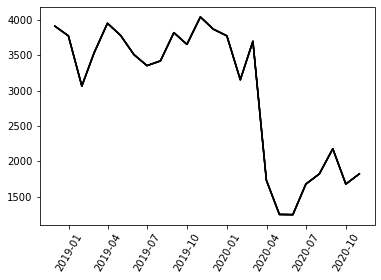

In [4]:
# 月ごとの利用者数
plt.plot(df.resample('M').count(), color="k")
plt.xticks(rotation=60)
plt.show()

2020/03から売上・利用者数が激減している

# どの様な利用者がいるのか

各利用者の利用回数の
* 平均値
* 中央地
* 最小値
* 最大値
を調べる

In [5]:
costomer_count = df['顧客ID'].value_counts()

x_mean = costomer_count.mean()
x_median = costomer_count.median()
x_min = costomer_count.min()
x_max = costomer_count.max()

print("平均値: {}".format(x_mean))
print("中央値: {}".format(x_median))
print("最小値: {}".format(x_min))
print("最大値: {}".format(x_max))

平均値: 13.073641997812613
中央値: 7.0
最小値: 1
最大値: 184


In [6]:
print("利用者: {}".format(costomer_count))

利用者: 110067    184
110043    153
110069    150
110159    125
110149    117
         ... 
112711      1
114109      1
114760      1
112682      1
114163      1
Name: 顧客ID, Length: 5486, dtype: int64


最小値が`1`、最大値が`184`で平均が`13`なので、最大値は平均から遠い位置にいる。  
この場合は最小値付近に利用回数が集中していて、最大値に近いものはまばらに点在するという状況が予想できる。

# 分布

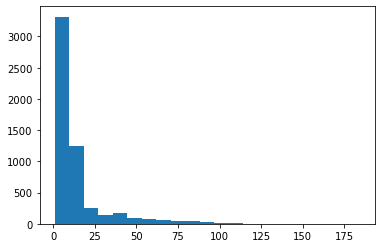

In [7]:
import matplotlib.pyplot as plt

x = df["顧客ID"].value_counts()

plt.hist(x, bins=21)
plt.show()

0付近にデータが集中しているので、ほとんどの客は一回から複数回の利用のみ。少数の客だけ極めて利用回数が高い。

0付近に多くのサンプルが集中し、それ以降は急激に減少する分布は「べき分布」と呼び  
「売上の8割は2割の顧客が生み出す」などの法則を裏付ける分布。

# 分布の近似曲線

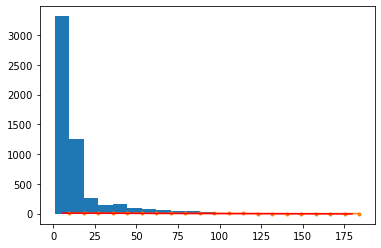

In [8]:
import numpy as np
import matplotlib.pyplot as plt

epsiron = 1
num = 15

x = df["顧客ID"].value_counts()
x_hist, t_hist, _ = plt.hist(x, bins=21)

weight = x_hist[1:num]
t = np.zeros(len(t_hist) - 1)

for i in range(len(t_hist) - 1):
    t[i] = (t_hist[i] + t_hist[i+1]) / 2
    
a, b = np.polyfit(t[1:num], np.log(x_hist[1:num]), 1, w=weight)

xt = np.zeros(len(t))
for i in range(len(t)):
    xt[i] = a * t[i] + b
    
plt.plot(t_hist[1:], np.log(x_hist + epsiron), marker=".")
plt.plot(t, xt, color="r")

plt.show()

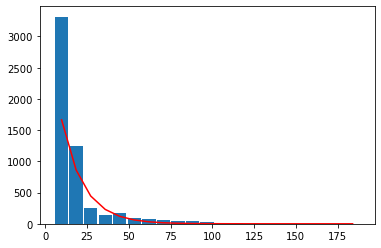

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

t = t_hist[1:]
xt = np.zeros(len(t))

for i in range(len(t)):
    xt[i] = math.exp(a * t[i] + b)
    
plt.bar(t_hist[1:], x_hist, width=8)
plt.plot(t, xt, color="r")
plt.show()

# プランごとのデータ抽出

In [10]:
print(df[df["プラン"] == "A"])

                       顧客ID    宿泊者名 プラン     金額
日時                                            
2018-11-01 00:12:22  111504    青山 零   A  15000
2018-11-01 00:18:26  114882    山岸 淳   A  15000
2018-11-01 00:20:47  110865   石田 和也   A  15000
2018-11-01 00:21:52  110069  山岸 聡太郎   A  15000
2018-11-01 15:02:07  111430   山田 明美   A  15000
...                     ...     ...  ..    ...
2020-10-31 22:14:38  110004   山岸 健一   A   3000
2020-10-31 23:38:51  110049   吉本 篤司   A   3000
2020-10-31 23:42:12  110127    喜嶋 浩   A   3000
2020-10-31 23:53:22  114657   鈴木 七夏   A   3000
2020-10-31 23:57:21  111407    鈴木 治   A   3000

[12954 rows x 4 columns]


In [11]:
print(df[df["プラン"] == "B"])

                       顧客ID    宿泊者名 プラン     金額
日時                                            
2018-11-01 00:02:21  110034   若松 花子   B  19000
2018-11-01 00:08:41  110169   坂本 直人   B  19000
2018-11-01 00:14:56  110482    津田 舞   B  19000
2018-11-01 00:46:21  110173   井高 知実   B  19000
2018-11-01 00:55:41  110549   加藤 英樹   B  19000
...                     ...     ...  ..    ...
2020-10-31 18:15:30  110195   加納 修平   B   7000
2020-10-31 21:35:22  111032   廣川 英樹   B   7000
2020-10-31 22:02:59  110579  桐山 さゆり   B   7000
2020-10-31 22:16:56  110408   大垣 太一   B   7000
2020-10-31 22:32:42  110666   山本 陽子   B   7000

[22724 rows x 4 columns]


In [12]:
print(df[df["プラン"] == "C"])

                       顧客ID    宿泊者名 プラン     金額
日時                                            
2018-11-01 00:46:03  112171  小泉 美加子   C  19000
2018-11-01 15:01:20  114476   青山 直樹   C  19000
2018-11-01 15:03:31  113109   田辺 翔太   C  19000
2018-11-01 15:33:46  111086  加藤 裕美子   C  19000
2018-11-01 15:34:55  113560  中村 くみ子   C  19000
...                     ...     ...  ..    ...
2020-10-31 20:52:00  110095   山口 太一   C   7000
2020-10-31 21:07:39  110061   田中 里佳   C   7000
2020-10-31 22:00:30  110010   山田 京助   C   7000
2020-10-31 22:55:52  114238   笹田 知実   C   7000
2020-10-31 23:26:38  110098   小泉 裕樹   C   7000

[13230 rows x 4 columns]


In [13]:
print(df[df["プラン"] == "D"])

                       顧客ID    宿泊者名 プラン     金額
日時                                            
2018-11-01 00:03:10  112804  津田 美加子   D  20000
2018-11-01 00:06:19  110275  吉本 美加子   D  20000
2018-11-01 00:27:19  112588   吉田 和也   D  20000
2018-11-01 00:32:59  110424   近藤 裕樹   D  20000
2018-11-01 00:38:43  110391   井高 知実   D  20000
...                     ...     ...  ..    ...
2020-10-31 22:08:15  110427   三宅 直人   D   8000
2020-10-31 22:08:30  115019   工藤 陽子   D   8000
2020-10-31 22:40:34  110398   木村 花子   D   8000
2020-10-31 22:54:27  110197    井高 零   D   8000
2020-10-31 23:47:24  115464   藤本 明美   D   8000

[22814 rows x 4 columns]


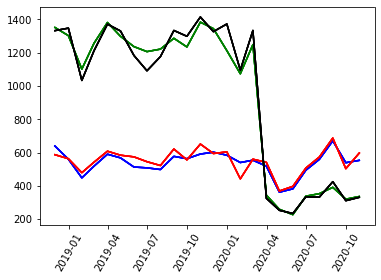

In [14]:
import matplotlib.pyplot as plt

plt.plot(df[df["プラン"] == "A"].resample('M').count(), color="b", label="A")
plt.plot(df[df["プラン"] == "B"].resample('M').count(), color="g", label="B")
plt.plot(df[df["プラン"] == "C"].resample('M').count(), color="r", label="C")
plt.plot(df[df["プラン"] == "D"].resample('M').count(), color="k", label="D")

plt.xticks(rotation=60)

plt.show()

In [15]:
for rank in range(10):
    id = df['顧客ID'].value_counts().index[rank]
    print(df[df['顧客ID'] == id])

                       顧客ID   宿泊者名 プラン     金額
日時                                           
2018-11-03 19:03:50  110067  石田 知実   B  19000
2018-11-03 23:35:27  110067  石田 知実   B  19000
2018-11-07 19:15:07  110067  石田 知実   D  20000
2018-11-14 23:01:12  110067  石田 知実   B  19000
2018-11-20 17:58:54  110067  石田 知実   D  20000
...                     ...    ...  ..    ...
2020-10-19 22:53:41  110067  石田 知実   D   8000
2020-10-22 15:22:04  110067  石田 知実   A   3000
2020-10-22 18:45:23  110067  石田 知実   C   7000
2020-10-22 23:35:10  110067  石田 知実   C   7000
2020-10-31 19:03:46  110067  石田 知実   A   3000

[184 rows x 4 columns]
                       顧客ID    宿泊者名 プラン     金額
日時                                            
2018-11-02 21:26:41  110043  斉藤 あすか   A  15000
2018-11-05 16:32:52  110043  斉藤 あすか   B  19000
2018-11-17 19:46:04  110043  斉藤 あすか   B  19000
2018-11-23 16:11:16  110043  斉藤 あすか   C  19000
2018-11-24 22:38:48  110043  斉藤 あすか   B  19000
...                     ...     ...  ..    ...
20

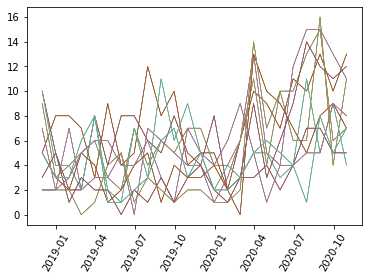

In [23]:
import matplotlib.pyplot as plt

for rank in range(10):
    id = df["顧客ID"].value_counts().index[rank]
    plt.plot(df[df["顧客ID"] == id].resample("M").count(), linewidth=0.5)

plt.xticks(rotation=60)
plt.show()